# Assessment of Household Satisfaction with Healthcare Services Delivered by Peripheral Health Units in Three Districts of Sierra Leone: A Demographic and Socio-Economic Analysis

## Description: Households were surveyed to assess their satisfaction levels with healthcare services provided by Peripheral Health Units (PHUs) in three districts of Sierra Leone. The survey aims to generate a detailed analysis of satisfaction rates, disaggregated across various demographic and socio-economic groups included in the study, to provide a comprehensive understanding of service delivery effectiveness and areas for improvement.

In [1]:
import pandas as pd

# Create the DataFrame
data = {
    "Age Category": ["Under 18", "Under 18", "18-29", "18-29", "30-49", "30-49", "50+", "50+"],
    "Sex": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Very Dissatisfied": [0.15, 1.03, 0.59, 2.49, 0.59, 1.47, 0.88, 0],
    "Dissatisfied": [0.59, 2.64, 1.61, 6.45, 0.73, 1.47, 0, 0.29],
    "Neutral": [0.59, 1.76, 0.73, 16.42, 1.17, 2.2, 0.29, 0.73],
    "Satisfied": [0.59, 1.32, 1.32, 8.36, 1.76, 4.69, 1.61, 1.03],
    "Very Satisfied": [2.2, 3.67, 3.08, 10.85, 3.67, 7.33, 2.49, 1.17],
    "Total": [4.11, 10.41, 7.33, 44.57, 7.92, 17.16, 5.28, 3.23]
}

df = pd.DataFrame(data)

# Calculate overall satisfaction rate (%)
df["Satisfaction Total"] = df["Satisfied"] + df["Very Satisfied"]
df["Satisfaction Rate (%)"] = (df["Satisfaction Total"] / df["Total"]) * 100

# Satisfaction rate across sex
satisfaction_by_sex = df.groupby("Sex")[["Satisfaction Total", "Total"]].sum()
satisfaction_by_sex["Satisfaction Rate (%)"] = (satisfaction_by_sex["Satisfaction Total"] / satisfaction_by_sex["Total"]) * 100

# Satisfaction rate across age group
satisfaction_by_age = df.groupby("Age Category")[["Satisfaction Total", "Total"]].sum()
satisfaction_by_age["Satisfaction Rate (%)"] = (satisfaction_by_age["Satisfaction Total"] / satisfaction_by_age["Total"]) * 100

# Display results
print("Overall Satisfaction Rate (%):")
print(df[["Age Category", "Sex", "Satisfaction Rate (%)"]])
print("\nSatisfaction Rate Across Sex:")
print(satisfaction_by_sex)
print("\nSatisfaction Rate Across Age Group:")
print(satisfaction_by_age)


Overall Satisfaction Rate (%):
  Age Category     Sex  Satisfaction Rate (%)
0     Under 18    Male              67.883212
1     Under 18  Female              47.934678
2        18-29    Male              60.027285
3        18-29  Female              43.100740
4        30-49    Male              68.560606
5        30-49  Female              70.046620
6          50+    Male              77.651515
7          50+  Female              68.111455

Satisfaction Rate Across Sex:
        Satisfaction Total  Total  Satisfaction Rate (%)
Sex                                                     
Female               38.42  75.37              50.975189
Male                 16.72  24.64              67.857143

Satisfaction Rate Across Age Group:
              Satisfaction Total  Total  Satisfaction Rate (%)
Age Category                                                  
18-29                      23.61  51.90              45.491329
30-49                      17.45  25.08              69.577352
50+    

In [3]:
import pandas as pd

# Create the DataFrame
data = {
    "Age Category": ["Under 18", "Under 18", "18-29", "18-29", "30-49", "30-49", "50+", "50+"],
    "Sex": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Very Dissatisfied": [0.15, 1.03, 0.59, 2.49, 0.59, 1.47, 0.88, 0],
    "Dissatisfied": [0.59, 2.64, 1.61, 6.45, 0.73, 1.47, 0, 0.29],
    "Neutral": [0.59, 1.76, 0.73, 16.42, 1.17, 2.2, 0.29, 0.73],
    "Satisfied": [0.59, 1.32, 1.32, 8.36, 1.76, 4.69, 1.61, 1.03],
    "Very Satisfied": [2.2, 3.67, 3.08, 10.85, 3.67, 7.33, 2.49, 1.17],
    "Total": [4.11, 10.41, 7.33, 44.57, 7.92, 17.16, 5.28, 3.23]
}

df = pd.DataFrame(data)

# Calculate the satisfaction rate for each group
df["Satisfaction Total"] = df["Satisfied"] + df["Very Satisfied"]
df["Satisfaction Rate (%)"] = (df["Satisfaction Total"] / df["Total"]) * 100

# Display the DataFrame with the new columns
print("Overall Satisfaction Rate (%):")
print(df[["Age Category", "Sex", "Satisfaction Rate (%)"]])


Overall Satisfaction Rate (%):
  Age Category     Sex  Satisfaction Rate (%)
0     Under 18    Male              67.883212
1     Under 18  Female              47.934678
2        18-29    Male              60.027285
3        18-29  Female              43.100740
4        30-49    Male              68.560606
5        30-49  Female              70.046620
6          50+    Male              77.651515
7          50+  Female              68.111455


## Satisfaction Rate by Age and  

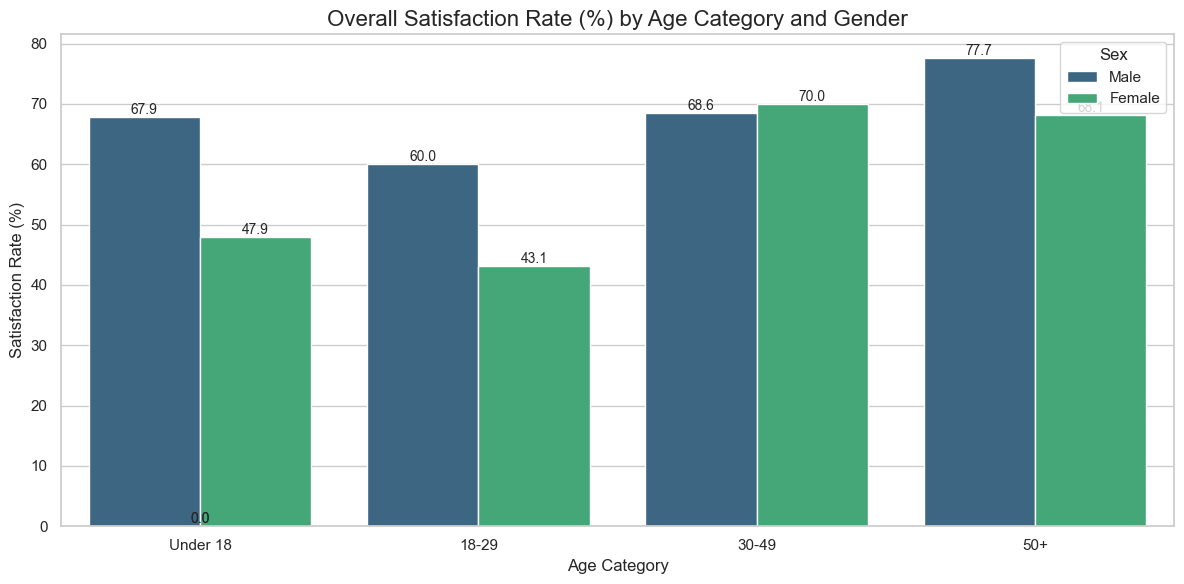

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Create a bar plot for Satisfaction Rate (%)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df,
    x="Age Category",
    y="Satisfaction Rate (%)",
    hue="Sex",
    palette="viridis"
)

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), ".1f"),  # Label with one decimal
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at top center of the bar
        ha="center", va="center",
        size=10,
        xytext=(0, 5),  # Slightly offset above the bar
        textcoords="offset points"
    )

# Customize plot appearance
plt.title("Overall Satisfaction Rate (%) by Age Category and Gender", fontsize=16)
plt.ylabel("Satisfaction Rate (%)", fontsize=12)
plt.xlabel("Age Category", fontsize=12)
plt.legend(title="Sex", loc="upper right")
plt.tight_layout()
plt.show()


## Satisfaction Across Age - Stack plot

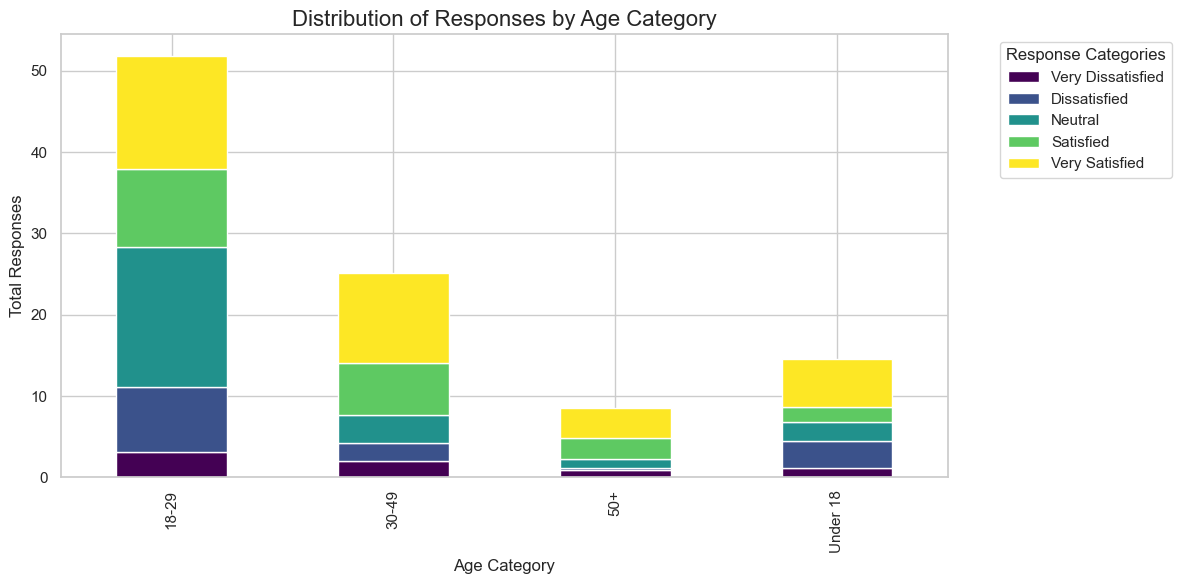

In [13]:
# Prepare data for stacked bar plot
response_columns = ["Very Dissatisfied", "Dissatisfied", "Neutral", "Satisfied", "Very Satisfied"]
df_stacked = df.groupby("Age Category")[response_columns].sum()

# Plot stacked bar chart
df_stacked.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="viridis"
)
plt.title("Distribution of Responses by Age Category", fontsize=16)
plt.ylabel("Total Responses", fontsize=12)
plt.xlabel("Age Category", fontsize=12)
plt.legend(title="Response Categories", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Satisfaction Rates (%) Across Age Categories and Gender

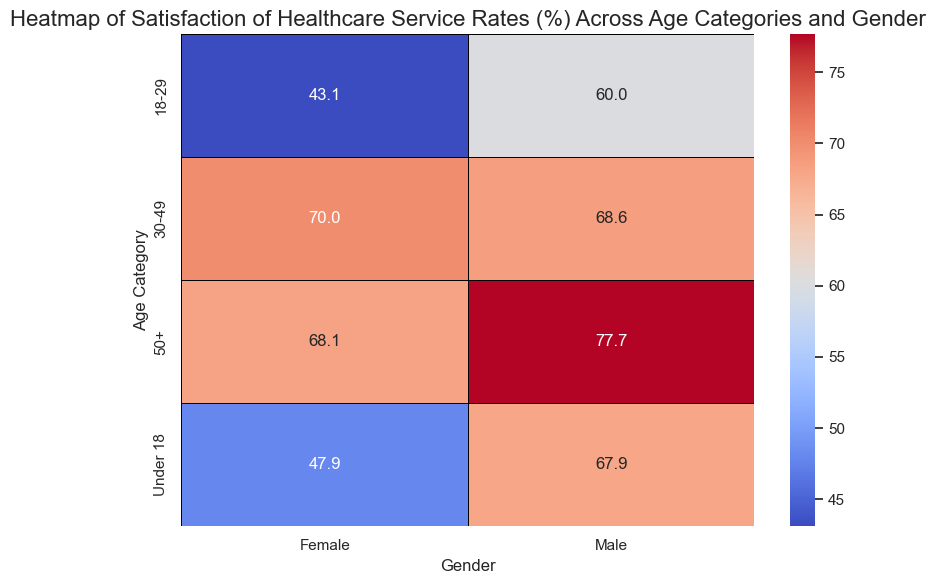

In [37]:
# Pivot table for the heatmap
heatmap_data = df.pivot(index="Age Category", columns="Sex", values="Satisfaction Rate (%)")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black"
)
plt.title("Heatmap of Satisfaction of Healthcare Service Rates (%) Across Age Categories and Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age Category", fontsize=12)
plt.tight_layout()
plt.show()


## Overall Satisfaction

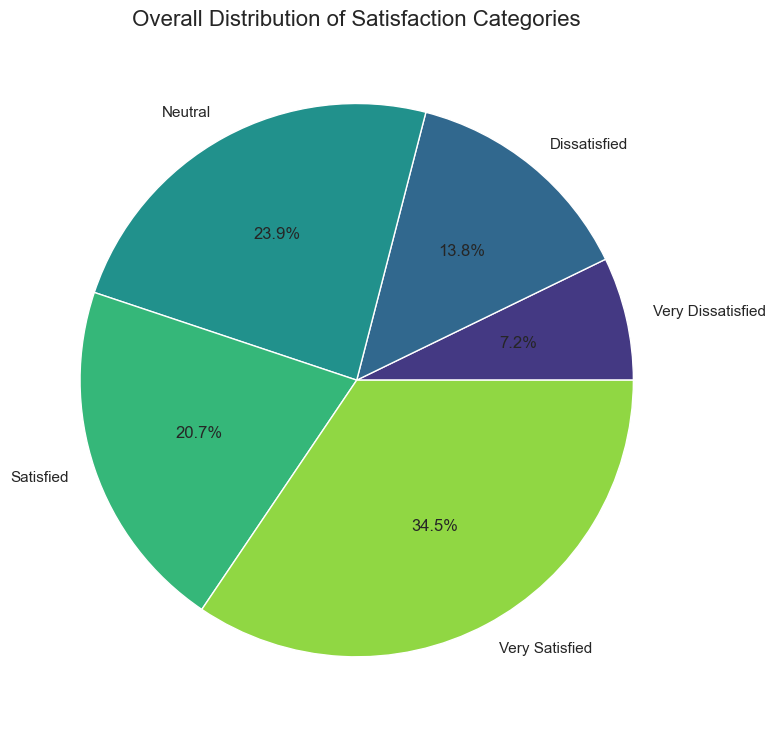

In [24]:
# Calculate total counts for each response category
response_totals = df[response_columns].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    response_totals,
    labels=response_totals.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("viridis", len(response_totals))
)
plt.title("Overall Distribution of Satisfaction Categories", fontsize=16)
plt.tight_layout()
plt.show()


## Trends in Satisfaction Rate Across the Target Group

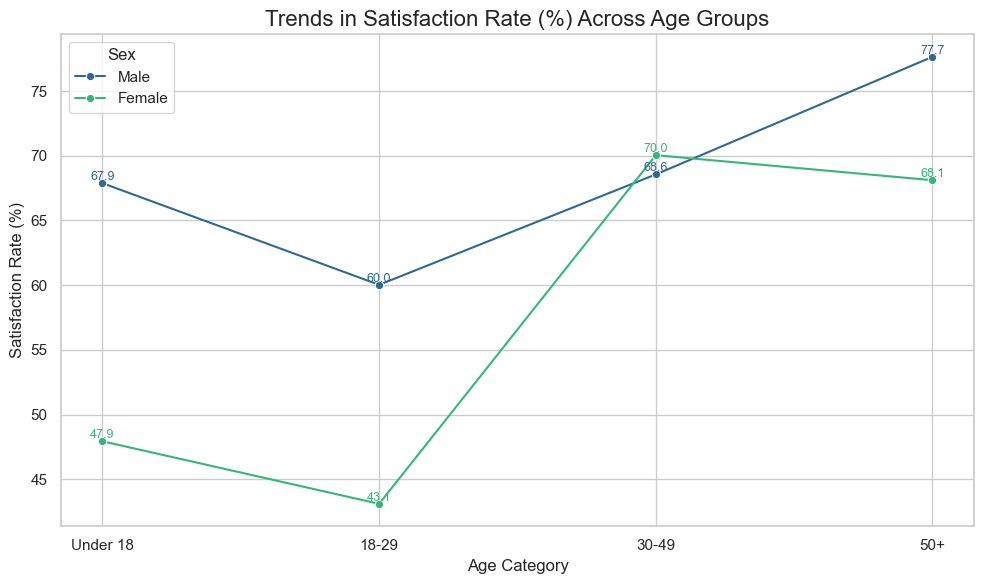

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare line plot data
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(
    data=df,
    x="Age Category",
    y="Satisfaction Rate (%)",
    hue="Sex",
    marker="o",
    palette="viridis"
)

# Add data labels
for line in lineplot.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        plt.text(
            x=x, y=y, 
            s=f"{y:.1f}",  # Format the label to 1 decimal place
            ha="center", va="bottom", fontsize=9, color=line.get_color()
        )

# Customize plot appearance
plt.title("Trends in Satisfaction Rate (%) Across Age Groups", fontsize=16)
plt.ylabel("Satisfaction Rate (%)", fontsize=12)
plt.xlabel("Age Category", fontsize=12)
plt.legend(title="Sex", loc="best")
plt.tight_layout()
plt.show()
